*This notebook is adapted from PHYS 105A materials by Dr. Gurtina Besla and Dr. Phil Pinto.*

## Contents

Mastering the art of `matplotlib`:
   1. The object-oriented interface 
   2. Creating and manipulating axes
   3. Plots and scatter plots
   4. Contour plots
   5. Image plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.dpi"] = 120

We'll start by creating some data to plot in the following examples:

In [3]:
x = np.linspace(0,8*np.pi,400)
y1 = np.sin(x)
y2 = np.exp(0.1*x)
ys = np.random.random(len(x))

`matplotlib.pyplot` has two modes of use:
 * The `pyplot` interface is designed to look as much as possible like MATLAB  
   It is a "state-based" interface; when you make a change to a plot, `matplotlib` automatically keeps track of the various components of the plot (axes, lines, points, etc.). This mode is sometimes the easiest to use, but it doesn't provide the level of control provided by the other mode,
 * The "object-oriented" (OO) interface. In this interface, one explicitly creates Python objects for each element of a plot
   and manipulates these objects to make changes in the plot. This gives one finer control over the look and behavior of the plot. The MATLAB interface is fine for doing simple, quick plots, but for anything fancier, the object-oriented interface is more intuitive.

In this exercise, we will be using the object-oriented interface. This exercise is not meant to be an exhaustive list of matplotlib's capabilties -- such a document would be hundreds of pages long! Rather, this is just a taste of the most common kinds of plots, with a smattering of fancier features just for fun.

We'll start with a simple plot just like those we have been making so far, but using the OO interface. 

I find that I start most of the plots I make in this way:
 * Start by making a figure and an axes object, often using the `plt.subplots` function
 * Add a line (or some other plot object) to the axes
 * Set properties of the axes like the plot limits and labels

Text(0.5, 1.0, 'Axes Title')

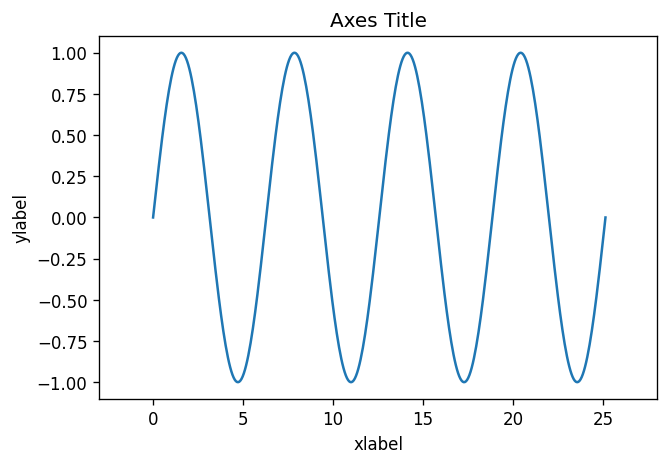

In [4]:
fig, ax = plt.subplots()      # create figure and axis objects

ax.plot(x, y1)                # add a plot to the axis

ax.set_xlim(-3,28)            # set limits for x axis
ax.set_xlabel('xlabel')       # set label for each axis
ax.set_ylabel('ylabel')
ax.set_title('Axes Title')

In `matplotlib` terminology, an "axes" object is a set of axes, usually with limits and one or more plot objects like lines and points on it. A "figure" is a collection of one or more axes, typically a complete plot window or sheet of paper or figure that you might include in a paper.

In this example, we used the `subplots` function to create both a figure and an axes object. We then added a `plot` object (the line) and labels to the axes object.

You can add as many "objects" to the axis as you like; the automatic scaling of the plot limits will take all objects into account if you don't set the limits explicitly

Text(0, 0.5, 'ylabel')

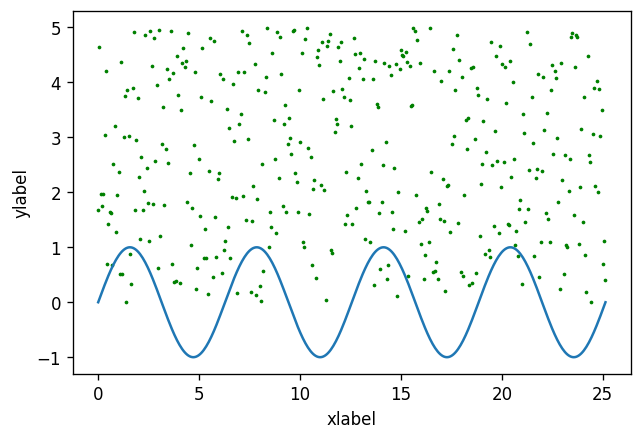

In [5]:
fig, ax = plt.subplots()                # create figure and axes objects
ax.plot(x, y1)                          # add a line plot to the axes
ax.scatter(x, 5 * ys, color='g', s=1.5) # add a scatter plot to the axes
ax.set_xlabel('xlabel')                 # set labels
ax.set_ylabel('ylabel')

It is often convenient to divide the various objects into two categories:

 * Objects which you place on a set of axes. The most common include lines, scatterplots, histograms, contour maps,  images, and text. Usually, when one adds one of these plot elements to an axes object, the axes object is modified in some default way, for example by automatically determining the values of the axis limits.
 
 * The axes themselves. These are usually manipulated to change the default behavior, to label various curves, or to set up a more complex plot. 

### Axes manipulation

Let's play with the axes first. As an example, consider putting two lines on an axes object. Instead of letting matplotlib choose a set of limits which include all of the points on both curves, one can "twin" an axis - make an axis on the other side which uses use a different set of limits.

Here we create a new twinned axes object called axright and use it to plot y2:

[Text(0, 0.5, 'right data [in red]')]

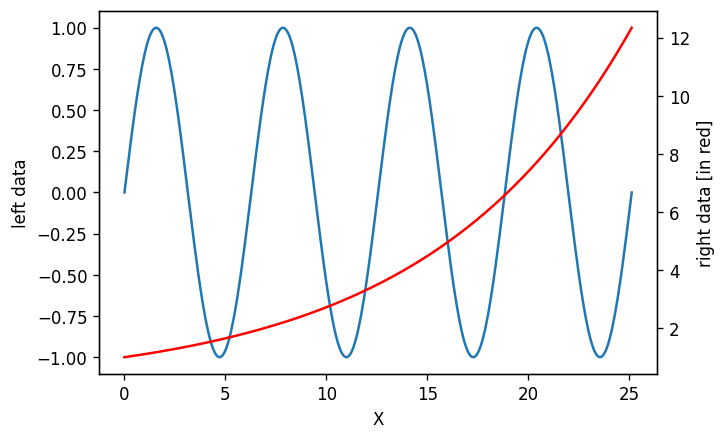

In [6]:
fig, ax = plt.subplots()                     # make a figure and an axis object

ax.plot(x, y1)                               # plot on the first axis
ax.set(xlabel='X', ylabel='left data')       # you can use "set" to set multiple objects

axright = ax.twinx()                         # make a right axis on the same axes object

axright.plot(x, y2, 'r')                     # plot using the right "twinned" axis
axright.set(ylabel='right data [in red]')

#### Twinning an axis

The object-oriented interface gives us great control over how a plot looks. It is, however, sometimes difficult to know what objects to change. Here, a web search is your friend. A bit of searching lead me to a stackoverflow posting to change the twinned axis to another color as follows.

Individual axes within an axes object are called "spines". We can use the various objects within our axis to set various properties. In this case, I set the color of the twinned y axis to red, set the spine of that axis to red, and then set the ticks on the axis to red as well.

This results in a plot which is much easier for the reader to interpret

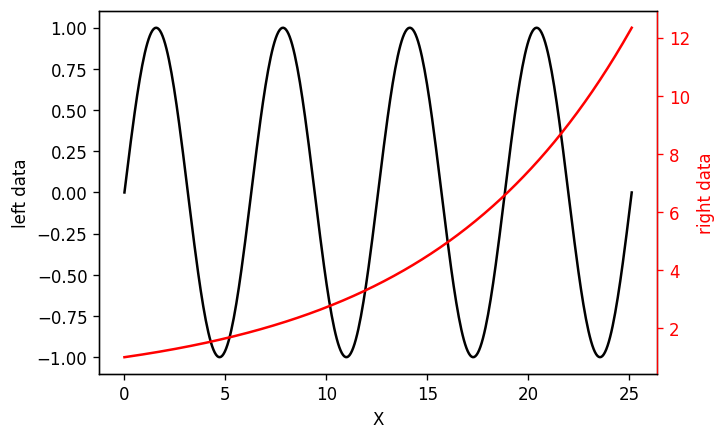

In [7]:
fig, ax = plt.subplots()                     # make a figure and an axis object

ax.plot(x, y1, 'k')                          # plot on the first axis
ax.set(xlabel='X', ylabel='left data')       # you can use "set" to set multiple objects

axright = ax.twinx()                         # make a right axis on the same axes object

axright.plot(x, y2, 'r')                     # plot using the right "twinned" axis
axright.set(ylabel='right data')

axright.yaxis.label.set_color('red')         # can set color of various objects
axright.spines['right'].set_color('red')
axright.tick_params(axis='y', colors='red')

#### Multiple Subplots

Another common need is for multiple axes in the same figure. For this, the simplest waty to start is to give arguments to `subplots` to specify the number of subplots (or panes) in each direction.

In this case, `subplots` returns a `numpy` array of axes. The axes are numbered from the top down (and from left to right in the case of a 2D array of subplots):

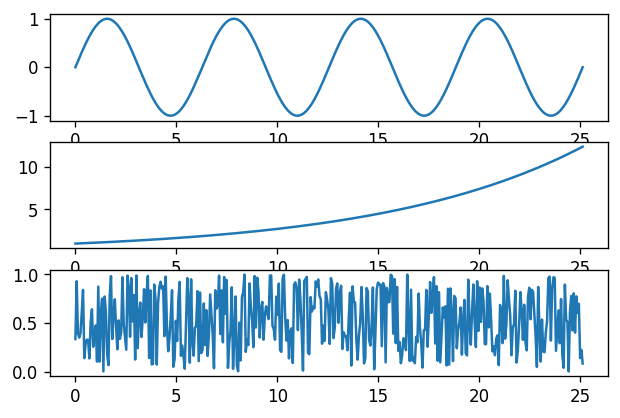

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=1)         # create three axis objects, returned in an array

ax[0].plot(x, y1)                                # panes are counted top down
ax[1].plot(x, y2)
ax[2].plot(x, ys)

This doesn't look very good -- a common problem with multiple subplots is that matplotlib doesn't leave enough room for labels.

We can fix this using the `subplots_adjust` function, asking matplotlib to leave extra space in the height direction using the `hspace` argument. Horizontal space is adjusted using the `wspace` argument.

Text(0.5, 1.0, 'pane 2')

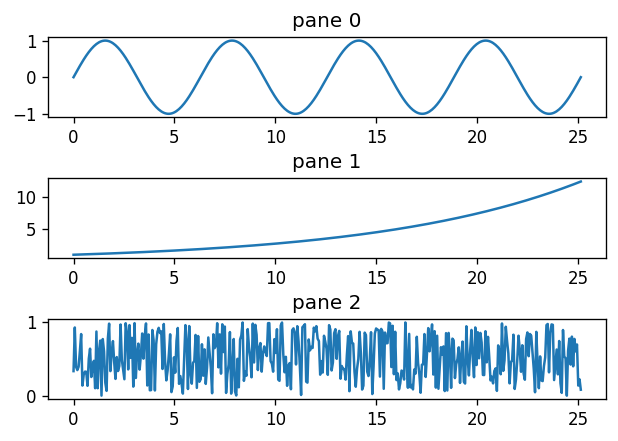

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1)         # create three axis objects, returned in an array
fig.subplots_adjust(hspace=0.75)  

ax[0].plot(x, y1)                      # panes are counted top down
ax[0].set_title('pane 0')
ax[1].plot(x, y2)
ax[1].set_title('pane 1')
ax[2].plot(x, ys)
ax[2].set_title('pane 2')

Of course, these all have the same x-axis, so we can ask matplotlib to share the x-axis among all subplots, and then
set the vertical space to zero

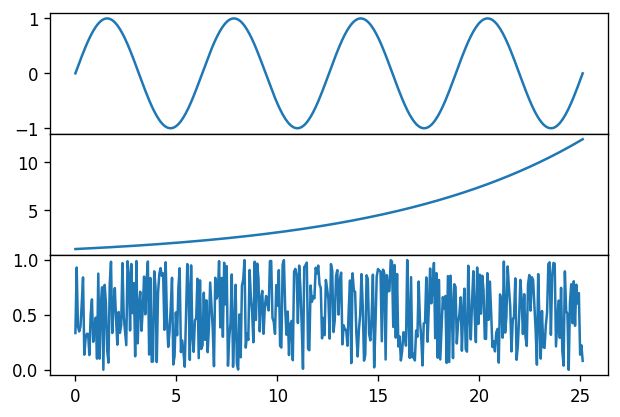

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)  
fig.subplots_adjust(hspace=0)  
ax[0].plot(x, y1)
ax[1].plot(x, y2)
ax[2].plot(x, ys)

This is better, but the tick labels in the y direction tend to run together, making the plot difficult to read.
We can move the ticks of the middle plot to the other side, and move the label to the right as well, by modifying their respective objects

Text(0, 0.5, 'ys')

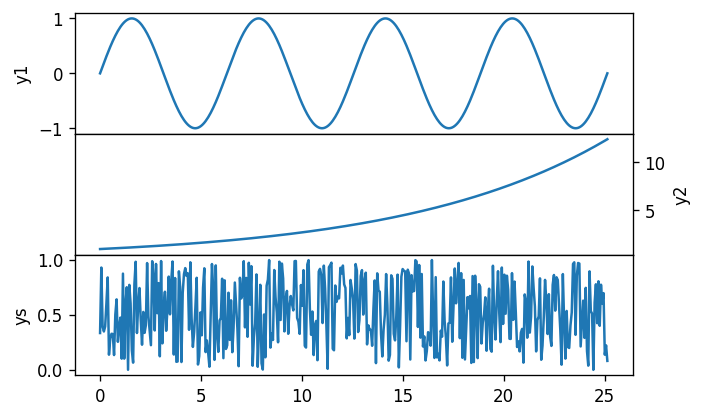

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)  
fig.subplots_adjust(hspace=0)

ax[0].plot(x, y1)
ax[0].set_ylabel('y1')

ax[1].plot(x, y2)
ax[1].yaxis.tick_right()                 # move ticks to the right side
ax[1].set_ylabel('y2')
ax[1].yaxis.set_label_position("right")  # move the y label to the right side

ax[2].plot(x, ys)
ax[2].set_ylabel('ys')

The axes for a two-dimensional grid of subplots is returned as a two-dimensional `numpy` array:

Text(0.5, 0, 'space')

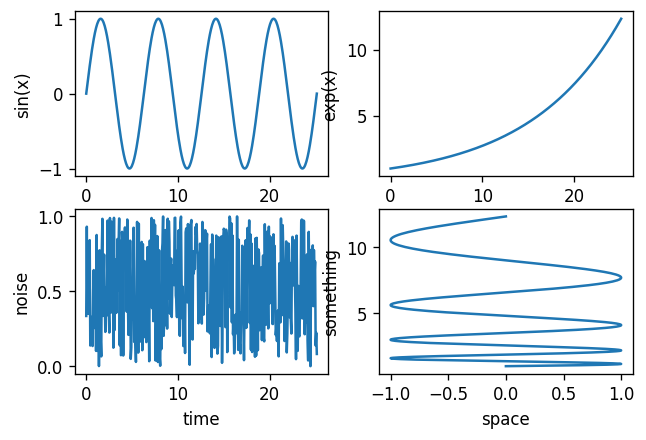

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2)     # create four axes objects, returned in a 2D array

ax[0,0].plot(x, y1)                          # panes are counted top down, and left-to-right
ax[0,0].set_ylabel('sin(x)')
ax[0,0].set_xlabel('time')

ax[0,1].plot(x, y2)
ax[0,1].set_ylabel('exp(x)')
ax[0,1].set_xlabel('space')

ax[1,0].plot(x, ys)
ax[1,0].set_ylabel('noise')
ax[1,0].set_xlabel('time')

ax[1,1].plot(y1, y2)
ax[1,1].set_ylabel('something')
ax[1,1].set_xlabel('space')

The defaults here are terrible! How to make room for the y labels of the right column of plots and make the x labels show up on the top row?

We can use the `plt.tight_layout` function to automatically save room

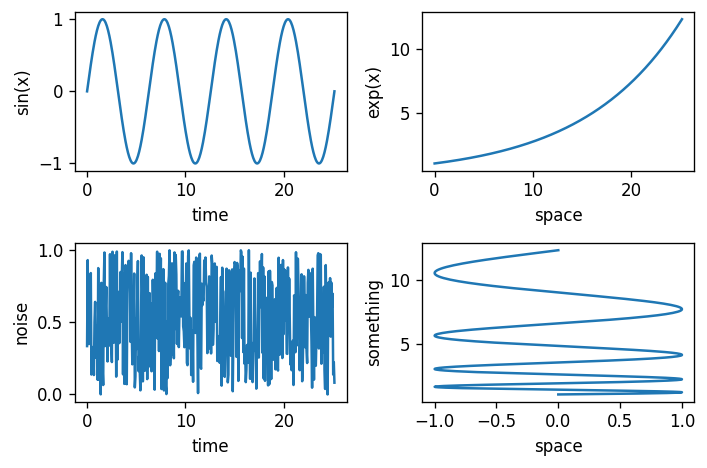

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2) # create four axis objects, returned in a 2D array

ax[0,0].plot(x, y1)                      # panes are counted top down, and left-to-right
ax[0,0].set_ylabel('sin(x)')
ax[0,0].set_xlabel('time')

ax[0,1].plot(x, y2)
ax[0,1].set_ylabel('exp(x)')
ax[0,1].set_xlabel('space')

ax[1,0].plot(x, ys)
ax[1,0].set_ylabel('noise')
ax[1,0].set_xlabel('time')

ax[1,1].plot(y1, y2)
ax[1,1].set_ylabel('something')
ax[1,1].set_xlabel('space')

plt.tight_layout()                      # make more room for labels

This might still confuse the reader, since it is not clear whether the y labels on the right column refer to the right column or the left one.

A better solution might be to place the y-axis labels in the right column on the other side of the plot

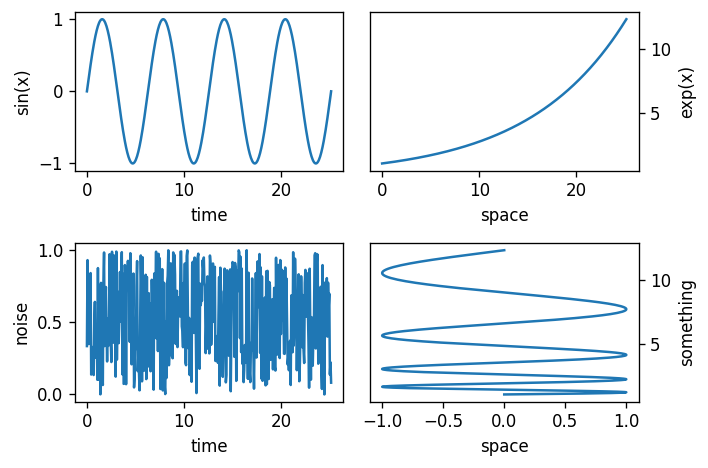

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2)         # create four axis objects, returned in a 2D array

ax[0,0].plot(x, y1)                              # panes are counted top down, and left-to-right
ax[0,0].set_ylabel('sin(x)')
ax[0,0].set_xlabel('time')

ax[1,0].plot(x, ys)
ax[1,0].set_ylabel('noise')
ax[1,0].set_xlabel('time')

ax[0,1].plot(x, y2)
ax[0,1].yaxis.set_label_position("right")        # put labels and ticks on right side
ax[0,1].yaxis.tick_right()
ax[0,1].set_ylabel('exp(x)')
ax[0,1].set_xlabel('space')

ax[1,1].plot(y1, y2)
ax[1,1].yaxis.set_label_position("right")        # put labels and ticks on right side
ax[1,1].yaxis.tick_right()
ax[1,1].set_xlabel('space')
ax[1,1].set_ylabel('something')

plt.tight_layout() 

#### Manipulating Axis Spines

The individual lines within a set of axes are called "spines". Sometimes you want to move these lines to a different location than the default. The `spines` object within an `axes` object gives us control over this:

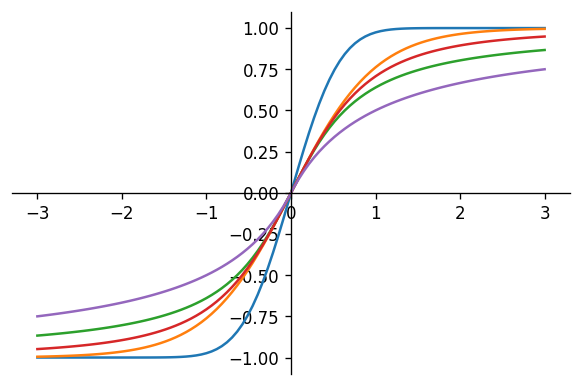

In [15]:
import numpy as np
from scipy.special import erf as erf
import matplotlib.pyplot as plt

x = np.linspace(-3,3,100)         # an x-grid

f0 = erf(0.5*np.pi*x)          # some random functions to plot
f1 = np.tanh(x)
f2 = 2/np.pi*np.arctan(np.pi/2*x)
f3 = x/(np.sqrt(1+x**2))
f4 = x/(1+np.abs(x))

fig, ax = plt.subplots()          # get an axes object

# here we set the spine placement based on data coordinates
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# and turn off the other two spines altogether
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.plot(x, f0) # finally, plot the lines
ax.plot(x, f1)
ax.plot(x, f2)
ax.plot(x, f3)
ax.plot(x, f4)

#### XKCD-style Plots

You can make a plot look hand-written, a la XKCD comics (xkcd.com), with the `plt.xkcd()` function.
This takes a little bit of work to make it look right, and you need to install the "humor-sans" font on your system,
but sometimes this is what you need to convey a point!

*If you're working on your own laptop, you can download "humor-sans" from [this repository](https://github.com/imkevinxu/xkcdgraphs/blob/master/Humor-Sans-1.0.ttf). If you're using OSX or Windows, double click to install; for Unix-based operating systems you might find some instructions [here](https://stackoverflow.com/questions/19663986/getting-xkcd-plots-using-matplotlib).*

findfont: Font family ['Humor Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Humor Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Humor Sans'] not found. Falling back to DejaVu Sans.


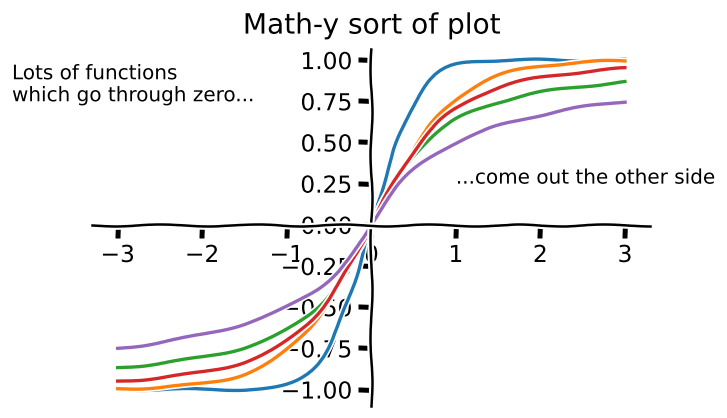

In [16]:
#uncomment this line if you just install "humor-sans" so that matplotlib can find it
#import matplotlib.font_manager as font_manager; font_manager._rebuild()
#comment again later, otherwise this cell will take a long time to execute again

x = np.linspace(-3,3,100)

f0 = erf(0.5*np.pi*x)
f1 = np.tanh(x)
f2 = 2/np.pi*np.arctan(np.pi/2*x)
f3 = x/(np.sqrt(1+x**2))
f4 = x/(1+np.abs(x))

with plt.xkcd():       # just use the xkcd style for this plot
    fig, ax = plt.subplots()

    ax.spines['left'].set_position(('data', 0.0))    # spine placement data centered
    ax.spines['bottom'].set_position(('data', .0))
    ax.spines['right'].set_color('none')             # no opposite side spines
    ax.spines['top'].set_color('none')

    ax.plot(x, f0)                                   # plot the functions
    ax.plot(x, f1)
    ax.plot(x, f2)
    ax.plot(x, f3)
    ax.plot(x, f4)

    hsfont = {'fontname':'Humor Sans'}
    ax.set_title('Math-y sort of plot', **hsfont)
    ax.text(-4.25, 0.75, 'Lots of functions\nwhich go through zero...', **hsfont, fontsize=12)
    ax.text(1, 0.25, '...come out the other side', **hsfont, fontsize=12)
    for tick in ax.get_xticklabels():
        tick.set_fontname("Humor Sans")
    for tick in ax.get_yticklabels():
        tick.set_fontname("Humor Sans")


### Plot Objects

Now we have some experience customizing axes, let's have a look at some more plot objects to place on them.

#### Markers

The `plot` function can be used to plot points as well as lines. The shape of the point is called a "marker", and matplotlib supplies a wide variety of markers. Search for "matplotlib markers" to find a comprehensive list.

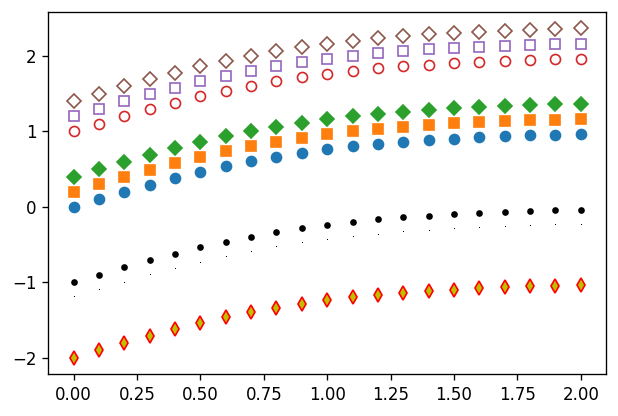

In [17]:
fig, ax = plt.subplots()
x = np.arange(0, 2.1, 0.1)
y = np.tanh(x)
                                             # filled markers
ax.plot(x, y, 'o')                           # circle
ax.plot(x, y+0.2, 's')                       # square
ax.plot(x, y+0.4, 'D')                       # diamond

ax.plot(x, y+1, 'o', fillstyle='none')       # open markers
ax.plot(x, y+1.2, 's', fillstyle='none')
ax.plot(x, y+1.4, 'D', fillstyle='none')

ax.plot(x, y-1, 'k.')                        # smaller points
ax.plot(x, y-1.2, 'k,')                      # single pixels

ax.plot(x, y-2, 'yd', markeredgecolor='r')   # different edge color from fill color on narrow diamond marker

#### Line Styles

We can change the line style from the default solid line to a variety of other forms.

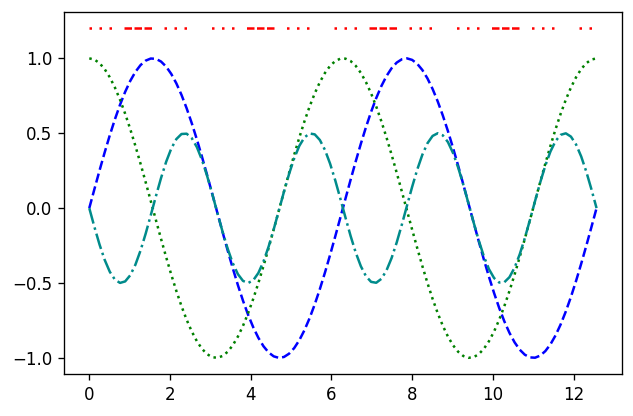

In [18]:
fig, ax = plt.subplots()
x = np.linspace(0,4*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = 0.5*np.cos(2*x+0.5*np.pi)

ax.plot(x,y1, 'b--')                              # dashed
ax.plot(x,y2, 'g:')                               # dotted 
ax.plot(x,y3, color='darkcyan', linestyle='-.')   # alternating dots and dashes
ax.plot(x, 1.2*np.ones_like(x), color='red', linestyle=(0, (1,3,1,3,1, 5, 3,1,3,1,3, 5, 1,3,1,3,1, 10)))  # SOS

#### Unsorted Data

Sometimes you have a line where the points are not in order, leading to a plot like this:

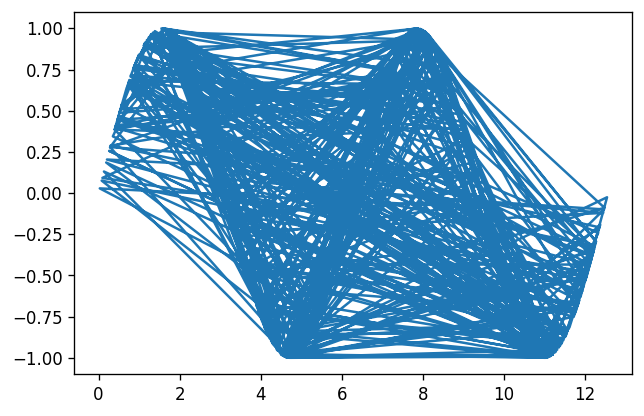

In [19]:
x = 4*np.pi*np.random.random(500)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)

One could, of course, sort the data into increasing order, but it is often simpler to use points. This removes the lines connecting the points which are causing the confusion.

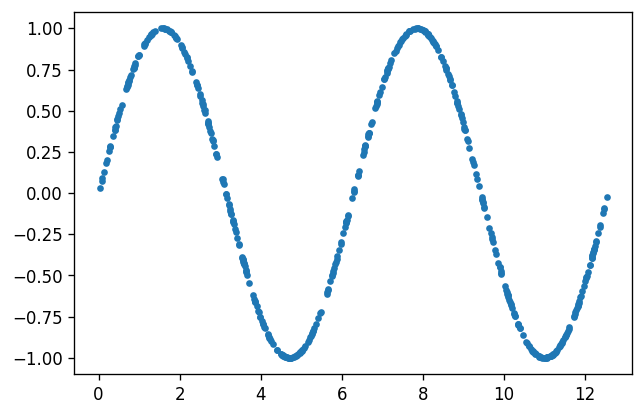

In [20]:
fig, ax = plt.subplots()
ax.plot(x,y,'.')

The sorting trick, by the way, goes like this:

When we sort an array, we are finding the *permutation* of the data (the order in which the data are listed) which brings the data into sorted order.

If we are going to sort a collection of x and y points, we need to find the permutation which brings the x data into sorted order, but then apply that permuation to *both* the x and the y arrays so that every y coordinate is still associated with the appropriate x coordinate.

`numpy` has a function `argsort` which doesn't sort the data, but instead returns an array, the *permutation vector*, which, when used as an index, places the data into sorted order. 

For the example data above, we can perform this trick as follows. Note that the data in the arrays x and y are not
sorted; we only pass a sorted version to the `plot` function

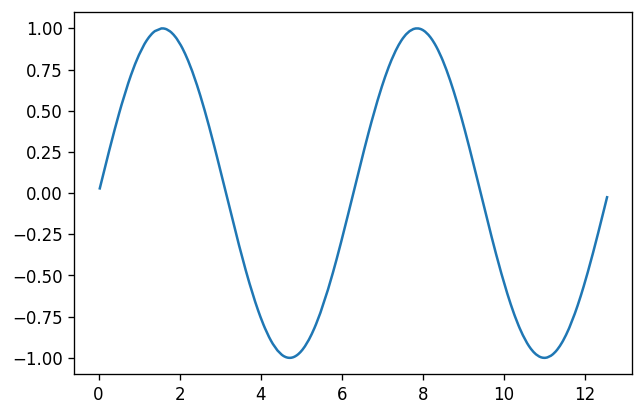

In [21]:
idx = np.argsort(x)         # find the permutation vector which sorts the x data

fig, ax = plt.subplots()
ax.plot(x[idx],y[idx])      # apply the permutation to both x and y

#### Error Bars

So far, we've been using the `plot` function to put data into our plots. `plot` is good for drawing lines and points. Especially when displaying data, we need to plot the error bars on the points. 

Let's make up some data to have something to plot and the use the `errorbar` function to plot the data. Note that one
must use the `fmt` argument to specify the plot color and markers. The `capsize` argument gives the size of the end of the errorbars.

<ErrorbarContainer object of 3 artists>

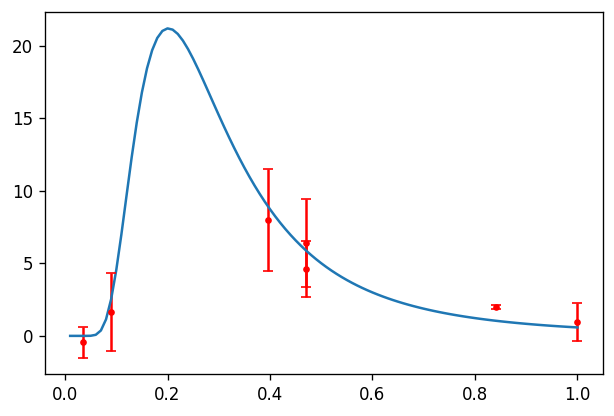

In [22]:
def planck(lam):                                 # function we might be trying to fit
    return 1/(np.exp(1/lam)-1)/lam**5

def experiment():                                # our simulated experiment, creating some data and error bars
    N = 7
    xd = np.random.random(N)                     # x of "data"
    yd = planck(xd) + np.random.normal(0, 1, N)  # y of "data", displaced by random amount
    yerr = 1+np.random.normal(1, 1, N)           # errorbar of "data" in y

    return xd, yd, yerr


np.random.seed(1209813)                          # seed the random number generator so we get the same points each time
                                                 # we run this example
    
x = np.linspace(0.01, 1, 100)                    # make a line containing the "model" we might be trying to fit
y = planck(x)

xdata, ydata, yerrors = experiment()             # get the experimental data

fig,ax = plt.subplots()
ax.plot(x, y)
ax.errorbar(xdata, ydata, yerr=yerrors, fmt='r.', capsize=3)

One can put errorbars in both the x and the y directions

<ErrorbarContainer object of 3 artists>

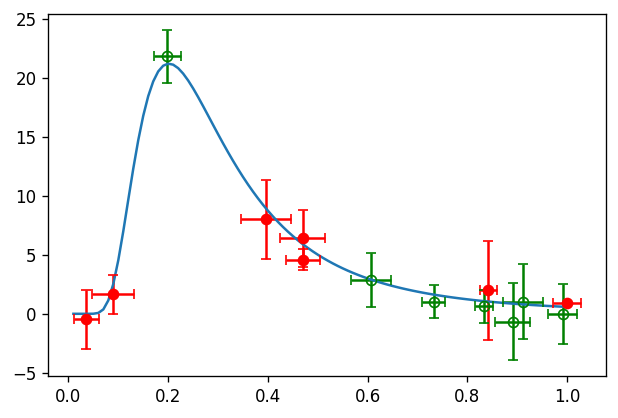

In [23]:
def experiment():
    N = 7
    xd = np.random.random(N)                     # x of "data"
    yd = planck(xd) + np.random.normal(0,1,N)    # y of "data", displaced by random amount
    xerr = 0.025+np.random.normal(0.01, 0.01, N) # errorbar of "data" in x
    yerr = 1+np.random.normal(1, 1, N)           # errorbar of "data" in y

    return xd, yd, xerr, yerr


np.random.seed(1209813)                     # seed the random number generator
    
x = np.linspace(0.01, 1, 100)               # function we might be trying to fit
y = planck(x)

fig,ax = plt.subplots()
ax.plot(x,y)

# first "experiment", filled circles
xdata, ydata, xerrors, yerrors = experiment()
ax.errorbar(xdata, ydata, xerr=xerrors, yerr=yerrors, fmt='ro', capsize=3)

# second "experiment", open circles
xdata, ydata, xerrors, yerrors = experiment()
ax.errorbar(xdata, ydata, xerr=xerrors, yerr=yerrors, fmt='go', fillstyle='none', capsize=3)

Sometimes errorbars are asymmetric -- they extend a different distance below and above the measured value. One can specify this by giving the error arguments a two-element list giving the lengths below and above the points

<ErrorbarContainer object of 3 artists>

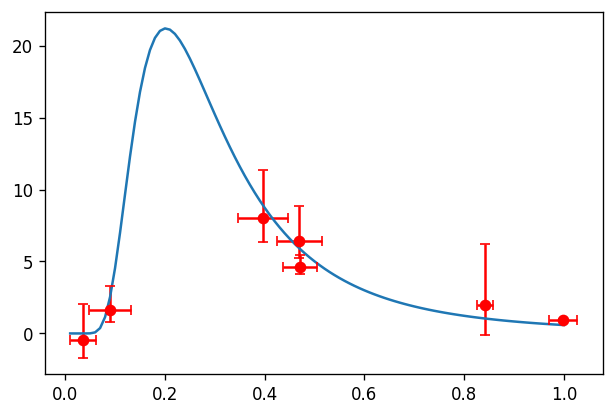

In [24]:
np.random.seed(1209813)                     # seed the random number generator
    
x = np.linspace(0.01, 1, 100)               # function we might be trying to fit
y = planck(x)

fig,ax = plt.subplots()
ax.plot(x,y)

# first "experiment", filled circles
xdata, ydata, xerrors, yerrors = experiment()
ax.errorbar(xdata, ydata, xerr=xerrors, yerr=[yerrors/2, yerrors], fmt='ro', capsize=3)

#### Text Objects

One can place text within a plot using the `text` function.

    ax.text(x,y,string)
    
places the beginning of the string at the given coordinates.

Text(0.25, 20, 'peak of Plank function')

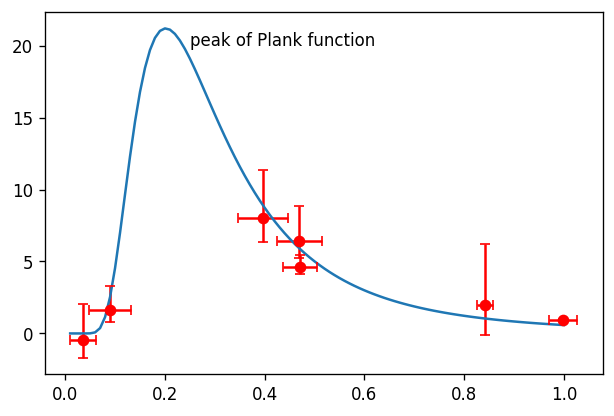

In [25]:
fig,ax = plt.subplots()
ax.plot(x,y)
ax.errorbar(xdata, ydata, xerr=xerrors, yerr=[yerrors/2, yerrors], fmt='ro', capsize=3)

ax.text(0.25, 20, 'peak of Plank function')

The alignment of the text with respect to the given coordinates can be varied using the `horizontalalignment` and `verticalalignment` arguments

Text(6, 3.5, 'center, bottom alignment')

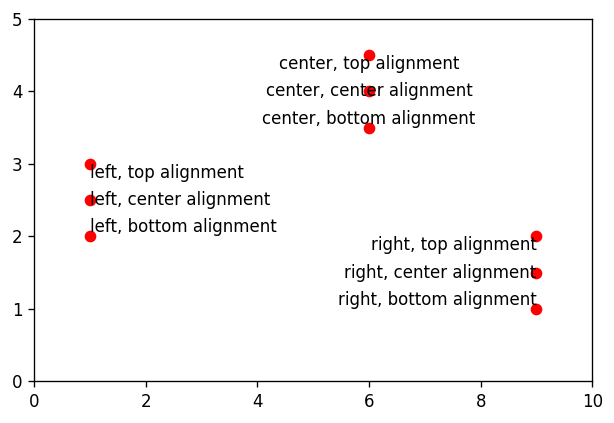

In [26]:
fig, ax = plt.subplots()
ax.set_xlim(0,10)
ax.set_ylim(0,5)

ax.plot(1,3,'ro')
ax.text(1,3,'left, top alignment', horizontalalignment='left', verticalalignment='top')
ax.plot(1,2.5,'ro')
ax.text(1,2.5,'left, center alignment', horizontalalignment='left', verticalalignment='center')
ax.plot(1,2,'ro')
ax.text(1,2,'left, bottom alignment', horizontalalignment='left', verticalalignment='bottom')
 
ax.plot(9,2,'ro')
ax.text(9,2,'right, top alignment', horizontalalignment='right', verticalalignment='top')
ax.plot(9,1.5,'ro')
ax.text(9,1.5,'right, center alignment', horizontalalignment='right', verticalalignment='center')
ax.plot(9,1,'ro')
ax.text(9,1,'right, bottom alignment', horizontalalignment='right', verticalalignment='bottom')


ax.plot(6,4.5,'ro')
ax.text(6,4.5,'center, top alignment',horizontalalignment='center', verticalalignment='top')
ax.plot(6,4,'ro')
ax.text(6,4,'center, center alignment',horizontalalignment='center', verticalalignment='center')
ax.plot(6,3.5,'ro')
ax.text(6,3.5,'center, bottom alignment',horizontalalignment='center', verticalalignment='bottom')


One can change the size and the angle of the text as well:

Text(0, -0.2, 'nwod edispu')

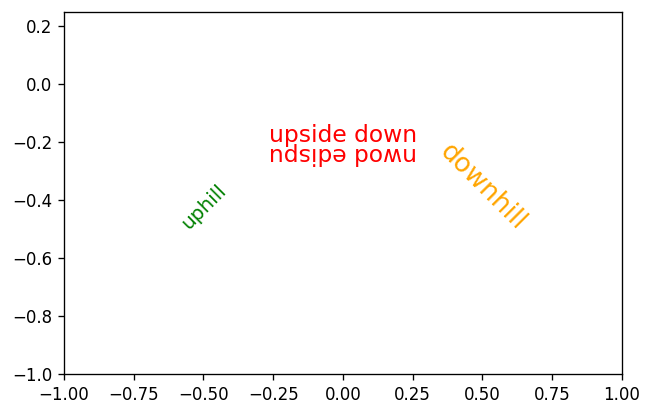

In [27]:
fig, ax = plt.subplots()

ax.set(xlim=[-1,1], ylim=[-1,0.25])  # can use set for limits as well
ax.text(-0.5, -0.5, 'uphill', rotation=45, fontsize=12,
        horizontalalignment='center', color='green')
ax.text(0.5, -0.5, 'downhill', rotation=-45, fontsize=16,
        horizontalalignment='center', color='orange')

ax.text(0, -0.2, 'upside down', rotation=0, fontsize=14,
        horizontalalignment='center', color='red')
ax.text(0, -0.2, 'nwod edispu', rotation=180, fontsize=14,
        horizontalalignment='center', verticalalignment='top',color='red')

#### Scatter Plots

You have already used the `scatter` function in an earlier problem set. Let's make some random data to plot, drawing points from a normal distribution in each dimension

In [28]:
mu = [0.5,1.0]
sigma = [0.3, 0.6]
N = 10000

xpts = np.random.normal(loc=mu[0], scale=sigma[0], size=N)
ypts = np.random.normal(loc=mu[1], scale=sigma[1], size=N)

color = np.sqrt( (xpts-mu[0])**2 + (ypts-mu[1])**2 )     # color by radius
size = (10*np.random.random(N))**2                       # random size

(-2.0, 4.0)

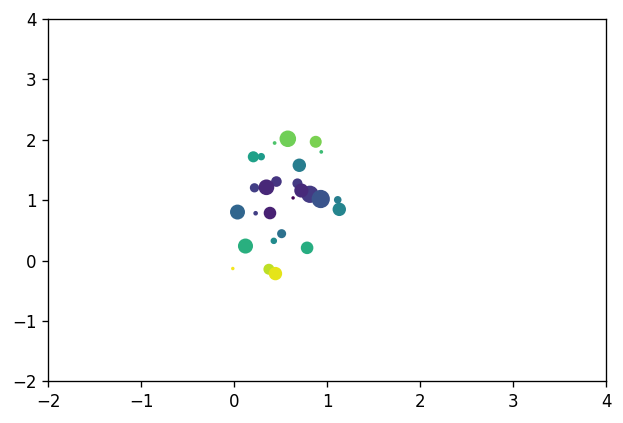

In [29]:
fig, ax = plt.subplots()

maxN = 30  # plot only the first maxN points

ax.scatter(xpts[:maxN], ypts[:maxN], c=color[:maxN], s=size[:maxN])
ax.set_xlim(-2,4)
ax.set_ylim(-2,4)

#### 1D Histograms

Another useful way to display data is the histogram. Matplotlib provides the `hist` function. Do a web search for all of the various parameters available. Here, we give `hist` the data, the number of bins to use, and the range for the bins.
You can easily see that the width of the distribution is wider in y than in x.

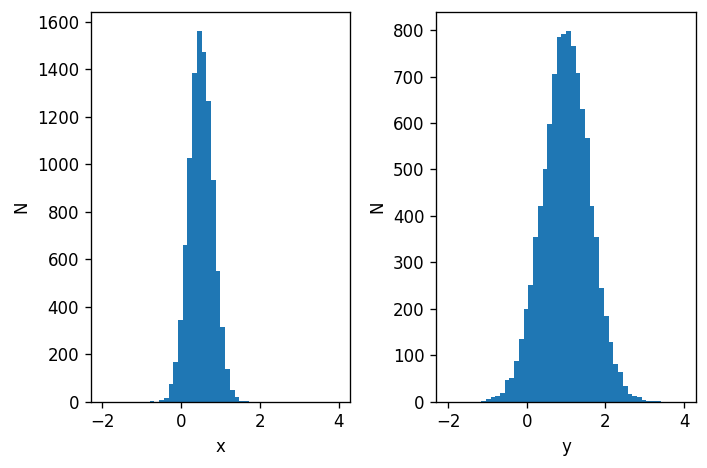

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(xpts, bins=50, range=[-2,4])
ax[0].set_xlabel('x')
ax[0].set_ylabel('N')

ax[1].hist(ypts, bins=50, range=[-2,4])
ax[1].set_xlabel('y')
ax[1].set_ylabel('N')

plt.tight_layout()

#### 2D Histograms

We can also display these data as a 2D histogram, where the "bins" are rectangles in the coordinates, and the number of points in each bin is given by the color of the rectangle

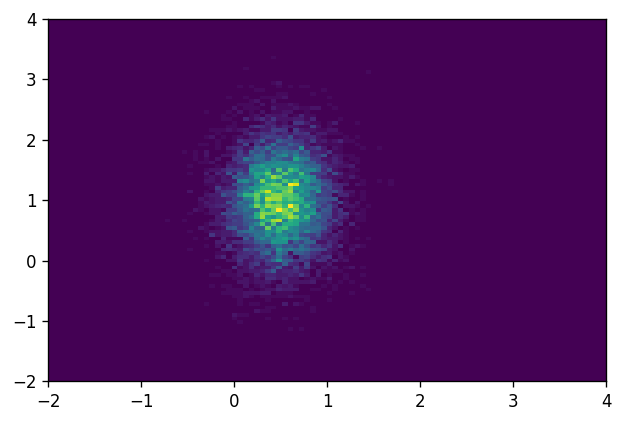

In [31]:
fig, ax = plt.subplots()
stuff = ax.hist2d(xpts, ypts, bins=100, range=[[-2,4],[-2,4]]) # "stuff =" keeps jupyter notebook from printing out the 
                                                               # data returned by hist

#### Colormaps

In the previous plot `hist` has used the default mapping between the value in the bin and the color displayed. This mapping is known as a *colormap*. `hist` scales the data to a value between 0 and 1, and then applies the colormap.

We can choose a different colormap

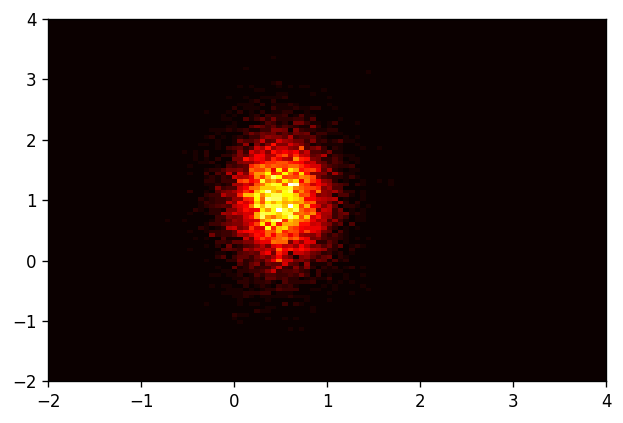

In [32]:
fig, ax = plt.subplots()
stuff = ax.hist2d(xpts, ypts, bins=100, range=[[-2,4],[-2,4]], cmap='hot')

#### Colorbars

We can add a "colorbar" to provide a scale for the number of points which fall into each bin:

Text(0, 0.5, 'y')

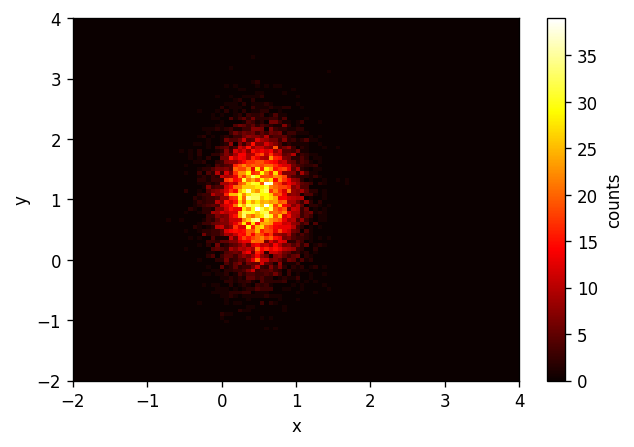

In [33]:
fig, ax = plt.subplots()
h = ax.hist2d(xpts, ypts, bins=100, range=[[-2,4],[-2,4]], cmap='hot')

cbar = plt.colorbar(h[3], ax=ax)  # the fourth component of h is the image object itself 
cbar.set_label('counts')

ax.set_xlabel('x')
ax.set_ylabel('y')

#### Aspect Ratio

A common problem is that matplotlib's axes default to be wider than they are high. In this case, we probably want a square image, reflecting the fact that there are the same number of bins in each direction -- the bins should appear square, and the distribution is narrower than the visual presentation suggests...

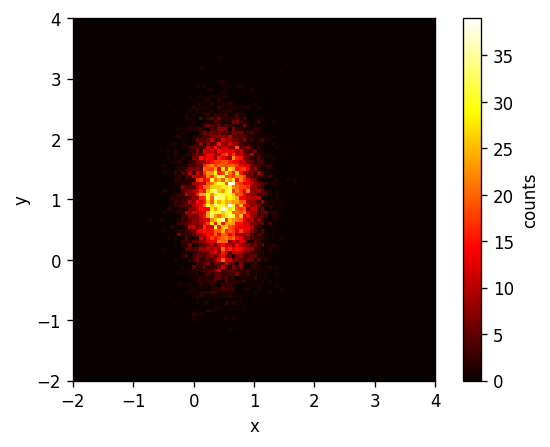

In [34]:
fig, ax = plt.subplots()
h = ax.hist2d(xpts, ypts, bins=100, range=[[-2,4],[-2,4]], cmap='hot')

cbar = plt.colorbar(h[3], ax=ax)
cbar.set_label('counts')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_aspect('equal')    # set the aspect ratio to 1

#### Contour Plots

A contour plot gives similar information as a 2D histogram, but draws lines of constant function value instead of using a colormap.

Let's make a 2D function on a grid. For this, one can use the numpy `meshgrid` function, which returns two arrays giving the x- and y-values on a 2D grid.

Thus, the point i,j has coordinates (X[i,j], Y[i,j]) and we can use these arrays in a `numpy` expression

In [35]:
x = np.linspace(0,1,5)                  # make an x and a y grid as 1D arrays
y = np.linspace(2,3,3)

X,Y = np.meshgrid(x,y)                  # make the 2D X and Y arrays

print("X: constant x in a column:")
print(X)
print()
print("Y: constant y in a row:")
print(Y)

X: constant x in a column:
[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]

Y: constant y in a row:
[[2.  2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5 2.5]
 [3.  3.  3.  3.  3. ]]


We now use `meshgrid` to compute a function in 2D using `numpy` expressions, and then give the data to the `contour` function. The X array gives the X values, the Y array gives the Y values, and the Z array gives the function values, all  at each point in the grid.

Text(0.5, 1.0, 'Some Crazy Function')

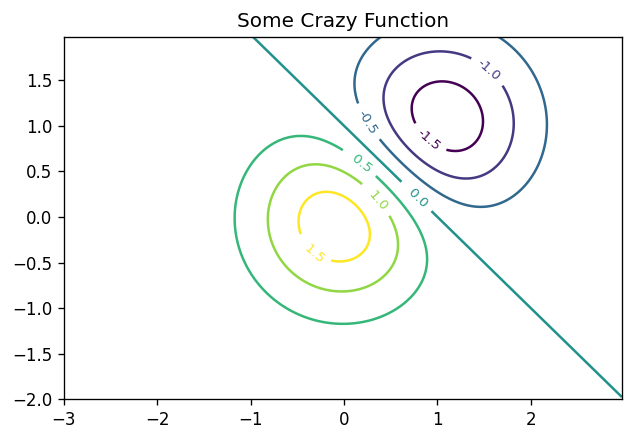

In [36]:
# make a grid:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)         # 1D arrays of x and y
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)                # 2D arrays giving x and y at the gridpoints

Z1 = np.exp(-X**2 - Y**2)               # compute the function as a 2D array
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)   # using the X and Y coordinates
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()

levels = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]  # the contour levels to plot
contours = ax.contour(X, Y, Z, levels=levels)
ax.clabel(contours,
          inline=True,                     # label the contours by putting the values in line with the curve
          fmt='%4.1f',                     # format for contour labels
          fontsize=8)                      # font size for format labels

ax.set_title('Some Crazy Function')

#### Filled Contours

We can also create a contour by coloring the plot. To do this, we use the `contourf` function

Text(0.5, 1.0, 'Some Crazy Function')

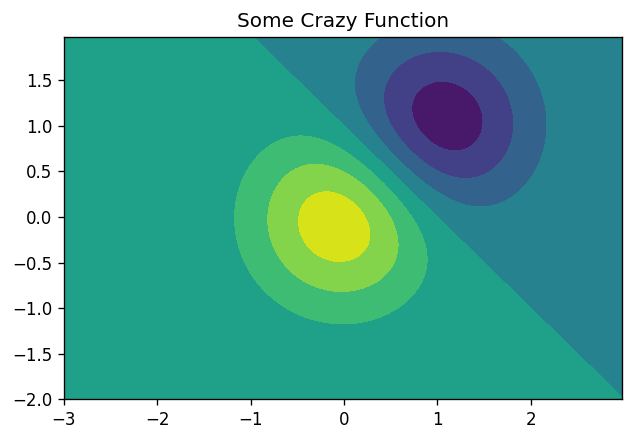

In [37]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)         # 1D arrays of x and y
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)                # 2D arrays giving x and y at the gridpoints

Z1 = np.exp(-X**2 - Y**2)               # compute the function as a 2D array
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)   # using the X and Y coordinates
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()

levels = np.arange(-2,2.5,0.5)
ax.contourf(X, Y, Z, levels=levels)     # color contour levels

ax.set_title('Some Crazy Function')

Just as we added multiple `plot` objects, one can add multiples of these more complex plot objects.

Here we add the contour lines to our filled-contour plot. When one color is chosen for the lines,
negative contours are shown as dashed lines.

Text(0.5, 1.0, 'Some Crazy Function')

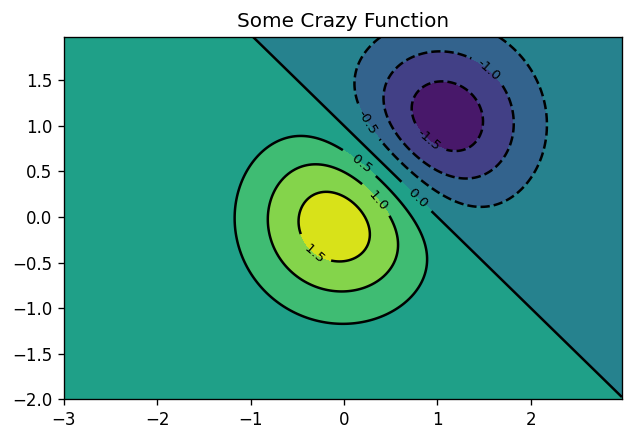

In [38]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)         # 1D arrays of x and y
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)                # 2D arrays giving x and y at the gridpoints

Z1 = np.exp(-X**2 - Y**2)               # compute the function as a 2D array
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)   # using the X and Y coordinates
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()

levels = np.arange(-2,2.5,0.5)
ax.contourf(X, Y, Z, levels=levels)        # color contour levels

contours = ax.contour(X, Y, Z,             # draw contour lines
                      levels=levels,
                      colors='black')
ax.clabel(contours,
          colors='black',                  # set the contour label color to black
          inline=True,                     # label the contours by putting the values in line with the curve
          fmt='%4.1f',                     # format for contour labels
          fontsize=8)                      # font size for format labels

ax.set_title('Some Crazy Function')

#### Displaying Images

Matplotlib provides the `imshow` function to display a 2D array using a colormap.

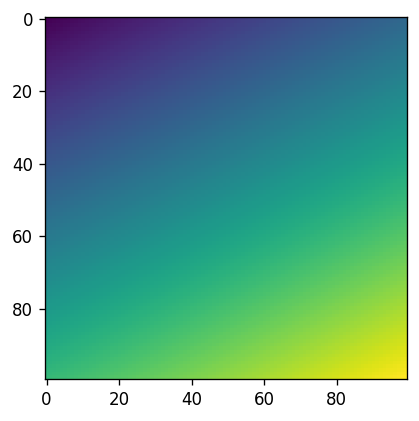

In [39]:
x = np.linspace(0,10,100)
y = np.linspace(-10,10,100)

X, Y = np.meshgrid(x,y)

Z = X + Y

fig, ax = plt.subplots()
ax.imshow(Z)


The axis numbers in this plot represent the row and column numbers of the array. 0,0 is the lowest value of the function and it appears at the top left corner of the image.

Often, one prefers to plot an image with the "origin" of the array indices at the lower-left corner. For this, one can use the `origin='lower'` argument

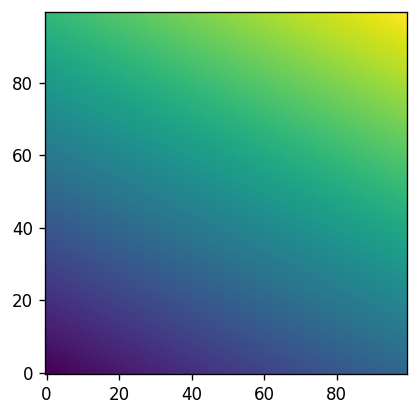

In [40]:
fig, ax = plt.subplots()
ax.imshow(Z, origin='lower')

We can make `imshow` display the actual coordinates we used instead of the array indices by using the `extent` argument,
giving it a list (or array) with [lower x, upper x, lower y, upper y]. The aspect ratio of the image is scaled to the data limits

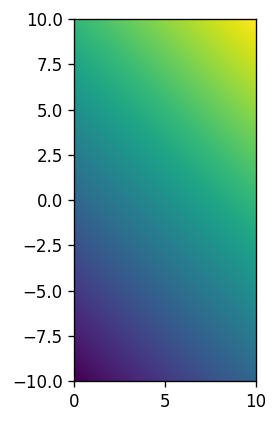

In [41]:
fig, ax = plt.subplots()
ax.imshow(Z, origin='lower', extent=[x[0], x[-1], y[0], y[-1]])

#### Finer Subplot Control: `gridspec`

Returning to mainpulating axes, it is possible to customize the layout of multiple axes further using `gridspec` (which must be imported separately from `matplotlib.gridspec`). This is getting pretty fancy; for further information look at some of the `gridspec` tutorials in the matplotlib web site.

As an example, here a 5 by 5 array or panes is created, but we assign the axes to span multiple panes.

This plot should remind you of the previous problem set. The two line plots are the marginal probability distributions in $\Omega_M$ and $\Omega_\Lambda$, and the contour plot is the joint probability distribution.

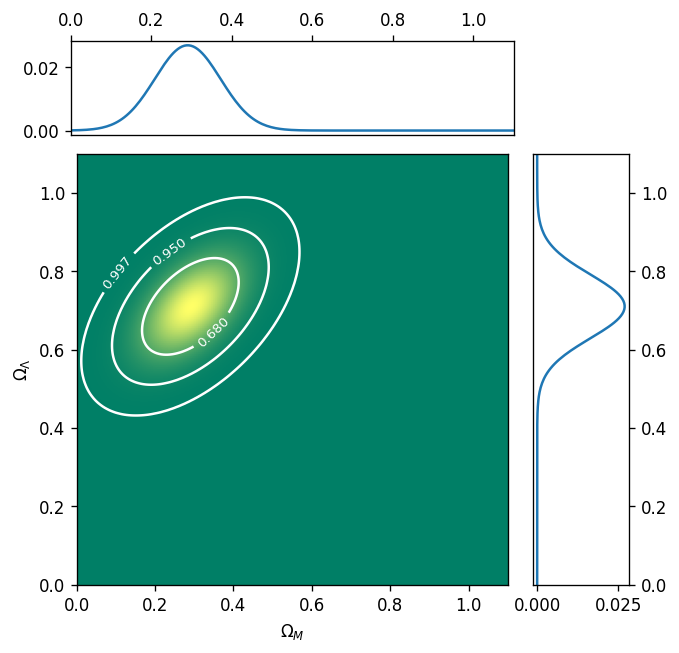

In [42]:
import matplotlib.gridspec as gridspec

# make a fake probability distribution resembling the supernova result
Ngrid = 200
Om = 0.29
Ol = 0.71
x = np.linspace(0, 1.1, Ngrid)
y = np.linspace(0, 1.1, Ngrid)
X, Y = np.meshgrid(x, y)
P = np.exp(-((X - Om)**2 + (Y - Ol)**2 - (X-Om) * (Y-Ol)) * 100)

# and make the marginal distributions
Px = np.sum(P, axis=0)
Px = Px/np.sum(Px)
Py = np.sum(P, axis=1)
Py = Py/np.sum(Py)

# create a figure
fig = plt.figure(figsize=(6, 6))

# create a gridspec -- a way to create multiple panes (subplots) in a figure
gs = gridspec.GridSpec(ncols=5, nrows=5, figure=fig)

# Create the main subplot axes: grid locations 1 through 4 in rows, and 0 through 3 in columns
axmain = fig.add_subplot(gs[1:, :-1])

# make a contour plot
contours = axmain.contour(X, Y, 1-P, 3, colors='white', levels=[0.68, 0.95, 0.997])
axmain.clabel(
    contours,
    inline=True,
    fontsize=8,
)

# and an image plot
axmain.imshow(P, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='summer')
axmain.set_xlabel('$\Omega_M$')
axmain.set_ylabel('$\Omega_\Lambda$')


axx = fig.add_subplot(gs[0, :-1])          # add a pane at row=0, spanning columns 0 through 3
axx.plot(x, Px)
axx.get_shared_x_axes().join(axmain, axx)  # use the same axis limits as the main plot for x
axx.xaxis.tick_top()                       # put x tick marks on top

axy = fig.add_subplot(gs[1:, -1])          # add a pane at column 4, spanning rows 1 through 4
axy.plot(Py, y)
axy.get_shared_y_axes().join(axmain, axy)  # use the same axis limits as the main plot for y
axy.yaxis.tick_right()                     # put y tick marks on right

### Saving a Plot to a File

Finally, one can save any plot to a file using the function `savefig(filename)`. The format of the file is determined by the extension to the given filename.

Matplotlib often leaves a fair bit of whitespace surrounding the plot when saved to a file. To avoid this,
one can use the `bbox_inches='tight'` argument to `savefig`.

If one uses a fixed-resolution file type, like jpg or png, the image will be saved pixel-by-pixel. The resolution
can be changed by specifying the `dpi` argument.

If one uses a scalable file type like pdf, then the resulting plot will be scaled to the size it has when it is displayed.

We can save the figure above with

In [43]:
fig.savefig('myfig.png', dpi=92) # save to fixed-resolution png file at 92 dots per inch

fig.savefig('myfig.pdf', bbox_inches='tight') # save to scalable pdf file, with as little white border as possible